# **Análisis del Precio de la Acción de Apple**

Se analizara el precio de la acción de Apple para crear un modelo de predicción el cual sera evaluado con los datos reales del DataFrame. 

# **Carga de librerías y archivo**

In [51]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import os

In [52]:
df = pd.read_csv(r'C:\Users\danielortega\OneDrive - HOTELERA YALKUITO SA DE CV\Desktop\No Borrar Daniel\30 Data Analyst - Curso\52_Módulo_46_Series_de_Tiempo\Modulo_46_Tarea_Series_de_Tiempo\Analista de datos AAPL_2006-01-01_to_2018-01-01_M30.csv', 
                 index_col='Date', parse_dates=['Date'])

df.sample(5)

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2009-06-09,20.540000,20.650000,20.080000,20.390000,169240876,AAPL
2011-04-06,48.750000,49.130000,48.160000,48.290000,100634681,AAPL
2014-08-29,102.860000,102.900000,102.200000,102.500000,44595247,AAPL
2010-02-09,28.060000,28.210000,27.820000,28.030000,158221028,AAPL
2012-06-06,81.110000,81.980000,80.790000,81.640000,100362262,AAPL


In [53]:
df.head(3)

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,10.340000,10.680000,10.320000,10.680000,201853036,AAPL
2006-01-04,10.730000,10.850000,10.640000,10.710000,155225609,AAPL
2006-01-05,10.690000,10.700000,10.540000,10.630000,112396081,AAPL


In [54]:
df.tail(3)

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2017-12-27,170.100000,170.780000,169.710000,170.600000,21498213,AAPL
2017-12-28,171.000000,171.850000,170.480000,171.080000,16480187,AAPL
2017-12-29,170.520000,170.590000,169.220000,169.230000,25999922,AAPL


____

# **Análisis Univariado**

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3019 entries, 2006-01-03 to 2017-12-29
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    3019 non-null   float64
 1   High    3019 non-null   float64
 2   Low     3019 non-null   float64
 3   Close   3019 non-null   float64
 4   Volume  3019 non-null   int64  
 5   Name    3019 non-null   object 
dtypes: float64(4), int64(1), object(1)
memory usage: 165.1+ KB


In [56]:
df.nunique()

Open      2630
High      2579
Low       2575
Close     2579
Volume    3019
Name         1
dtype: int64

In [57]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [58]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,3019.00,64.67,44.52,7.39,23.43,57.86,99.16,175.11
High,3019.00,65.26,44.81,7.56,23.80,58.46,100.28,177.20
Low,3019.00,64.03,44.23,7.17,23.02,57.32,98.39,174.86
Close,3019.00,64.66,44.54,7.24,23.42,57.92,99.48,176.42
Volume,3019.00,131145687.66,101855966.22,11475922.00,52928887.00,106627080.00,179897651.50,843264044.00


In [59]:
df[df==0].count() / df.count()

Open     0.00
High     0.00
Low      0.00
Close    0.00
Volume   0.00
Name     0.00
dtype: float64

In [60]:
df.isnull().sum()

Open      0
High      0
Low       0
Close     0
Volume    0
Name      0
dtype: int64

In [61]:
df.isna().sum()

Open      0
High      0
Low       0
Close     0
Volume    0
Name      0
dtype: int64

In [62]:
df.shape

(3019, 6)

In [63]:
columnas = df.columns

for i in columnas:
    print(i)
    print(' ')
    print(df[i].unique())

Open
 
[ 10.34  10.73  10.69 ... 170.1  171.   170.52]
High
 
[ 10.68  10.85  10.7  ... 170.78 171.85 170.59]
Low
 
[ 10.32  10.64  10.54 ... 169.71 170.48 169.22]
Close
 
[ 10.68  10.71  10.63 ... 170.6  171.08 169.23]
Volume
 
[201853036 155225609 112396081 ...  21498213  16480187  25999922]
Name
 
['AAPL']


___

# **Visualización de Series de tiempo**

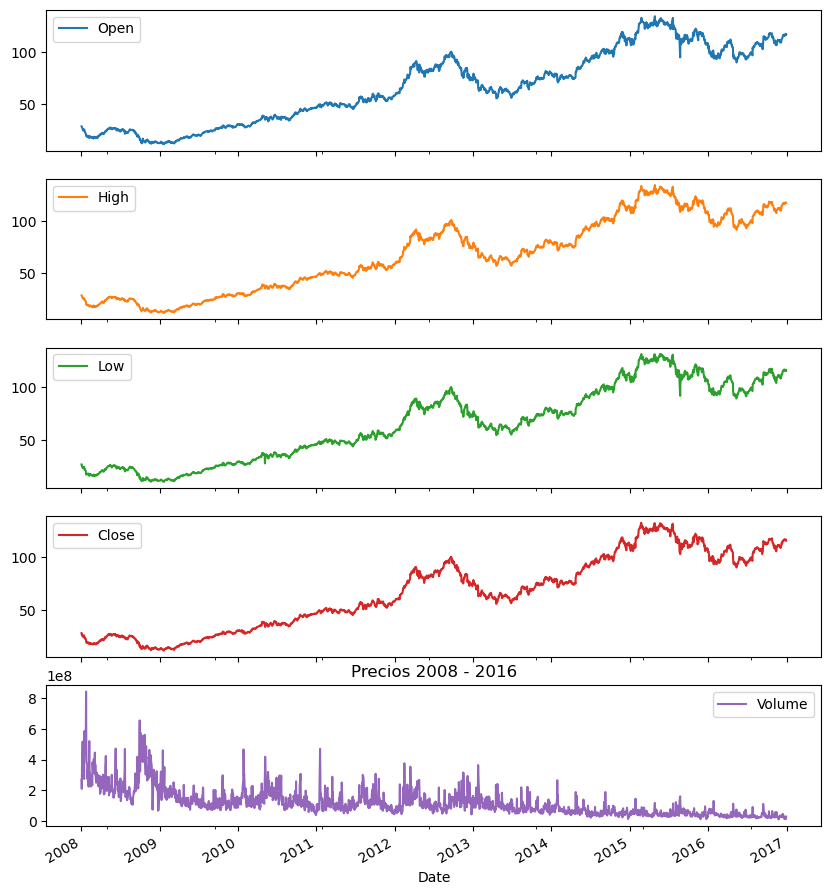

In [64]:
df['2008':'2016'].plot(subplots= True, figsize=(10,12))
plt.title('Precios 2008 - 2016')
plt.show()

In [65]:
df['Name'].unique()

array(['AAPL'], dtype=object)

____
# **Visualización de Lags**

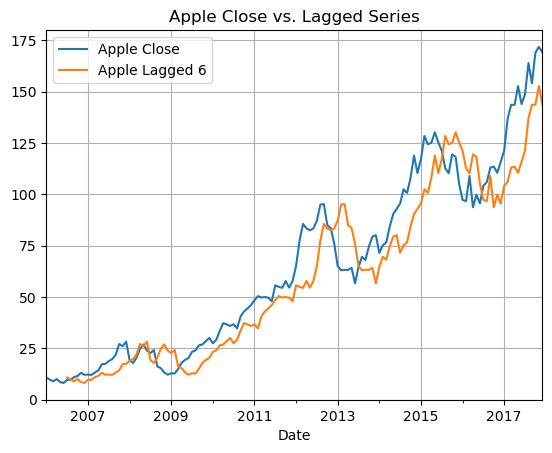

In [66]:
import matplotlib.pyplot as plt

# Convertimos a frecuencia mensual tomando el último valor del mes
monthly_close = df['Close'].resample('ME').last()

# Graficamos la serie original
monthly_close.plot(legend=True, label='Apple Close')

# Definimos el lag
lag = 6
shifted = monthly_close.shift(lag)

# Graficamos la serie desplazada
shifted.plot(legend=True, label=f'Apple Lagged {lag}')

# Detalles
plt.title("Apple Close vs. Lagged Series")
plt.grid(True)
plt.show()

In [67]:
df['Change'] = df.Close.div(df.Close.shift())

In [68]:
pd.set_option('display.float_format', lambda x: '%4f' % x)

In [69]:
df['Change'].plot(figsize=(20,8)).grid()

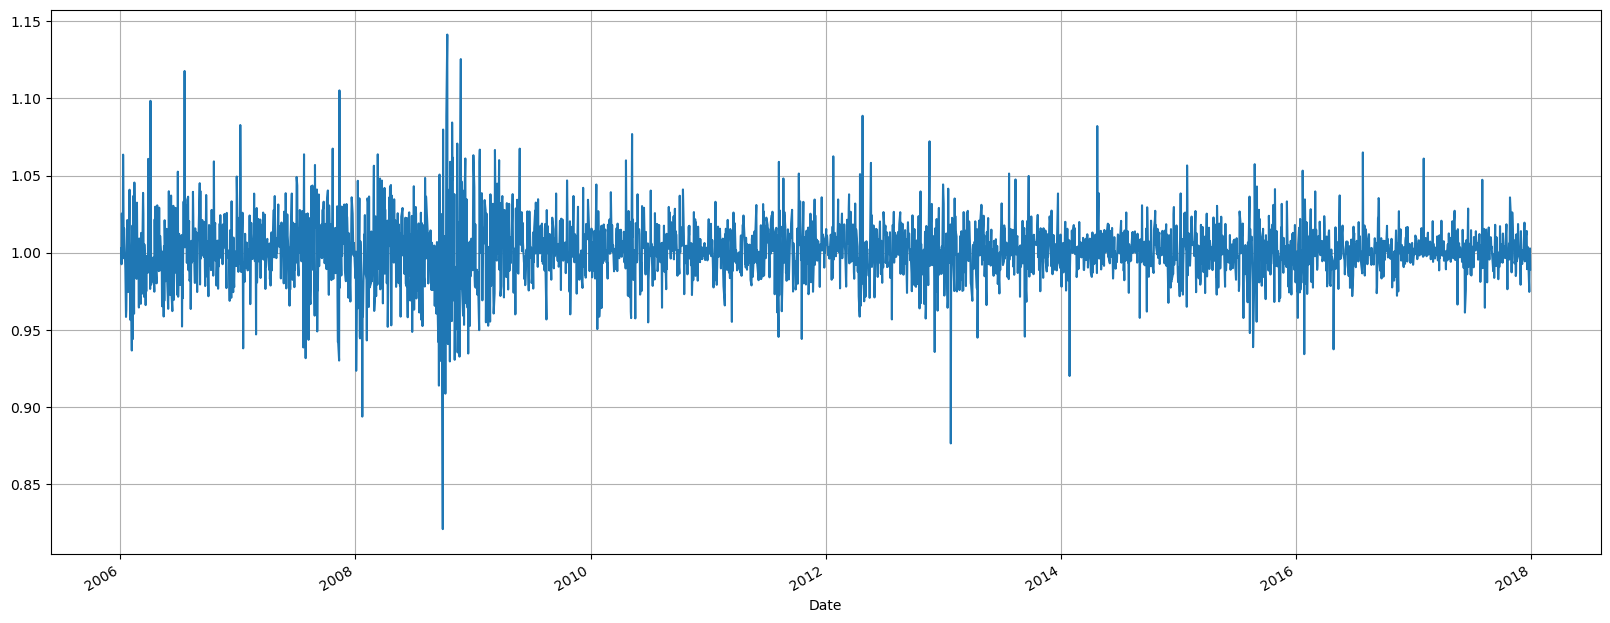

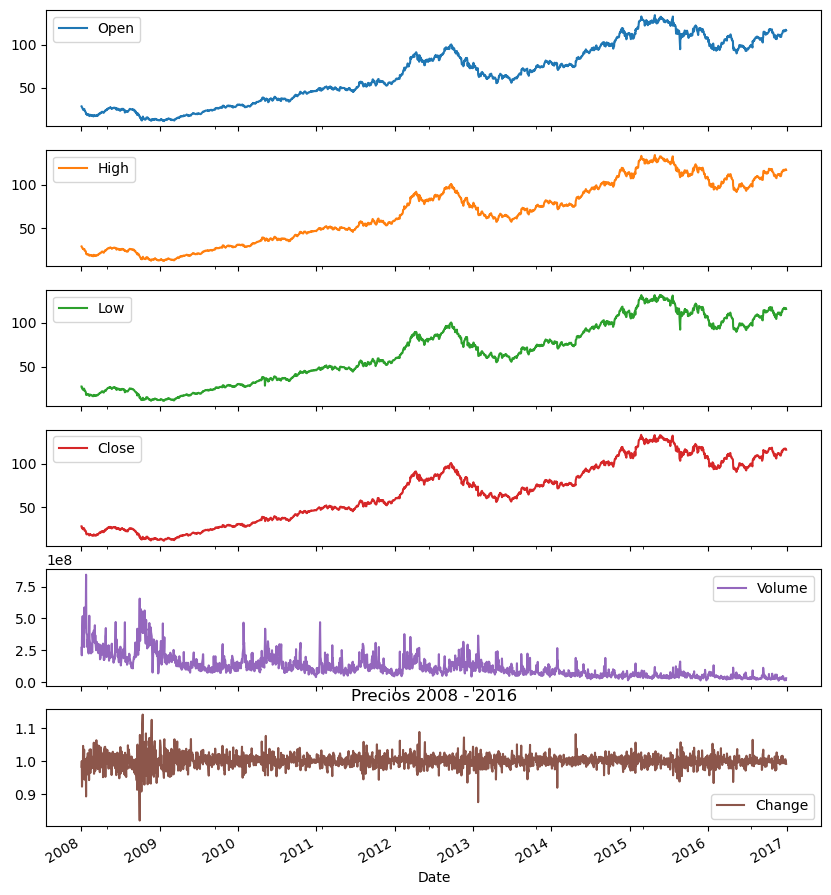

In [70]:
df['2008':'2016'].plot(subplots= True, figsize=(10,12))
plt.title('Precios 2008 - 2016')
plt.show()

In [71]:
df['Return'] = df.Change.sub(1).mul(100)

In [72]:
df['Return'].plot(figsize=(20,8)).grid()

___

# **Visualización de Medias**

In [73]:
df_apple = df

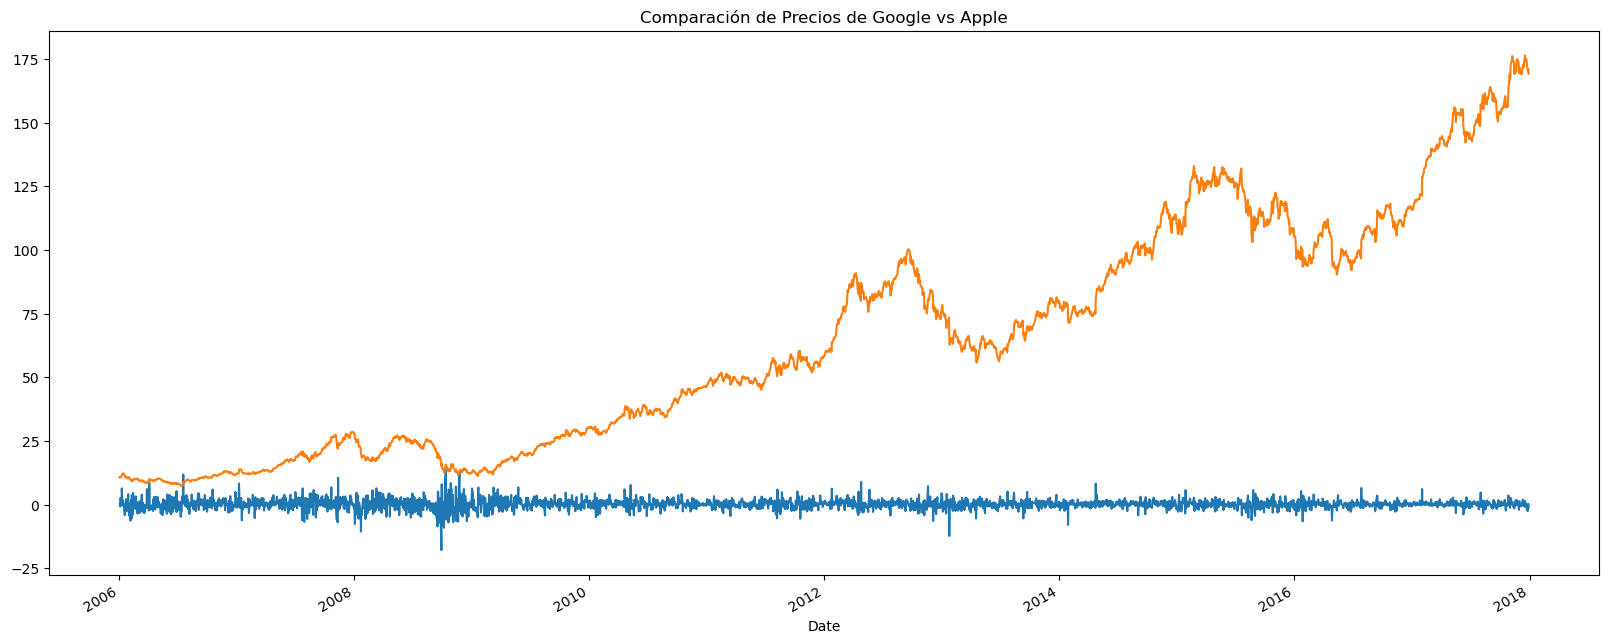

In [74]:
df_apple.Close.plot()
plt.title('Comparación de Precios de Google vs Apple')
plt.show()

In [75]:
normal_apple = df_apple.Close.div(df_apple.Close.iloc[0]).mul(100)
normal_apple.plot()

<Axes: xlabel='Date'>

In [76]:
rolling_google = df_apple.Close.rolling(90).mean()
df_apple.Close.plot()
rolling_google.plot()
plt.legend(['Apple Close', 'Apple Rolling 90 días']) 
plt.title('Apple Close vs Media Móvil 90 días')

Text(0.5, 1.0, 'Apple Close vs Media Móvil 90 días')

____
# **Visualizaciones Financieras: Gráficos OHLC**


In [77]:
# Librerías de base
import matplotlib.pyplot as plt
%matplotlib inline
from pylab import rcParams

# Plotly - elige UNA opción:
# Opción 1: Solo offline (recomendado para la mayoría de casos)
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
import plotly.figure_factory as ff
init_notebook_mode(connected=True)

# Opción 2: Si realmente necesitas chart_studio (descomenta estas líneas)
from chart_studio import plotly
from chart_studio import grid_objs
import chart_studio.plotly as py

# Análisis estadístico
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Librerías numéricas
import numpy as np
from numpy.random import normal, seed
from scipy.stats import norm  # Corregido: era scypy.stats

# Machine Learning
from sklearn.metrics import mean_squared_error

# Utilidades
import math

## **Gráfico OHLC**

In [78]:
df_apple.index = pd.to_datetime(df_apple.index)

In [79]:
df_mes = df_apple.loc['2008-06']


In [80]:
rango_ohlc = go.Ohlc(x=df_mes.index,
                     open=df_mes['Open'],
                     high=df_mes['High'],
                     low=df_mes['Low'],
                     close=df_mes['Close'])

iplot([rango_ohlc])

## **Gráficos de Velas**

In [81]:
df_mes = df_apple.loc['2008-06']

In [82]:
trace = go.Candlestick(x=df_mes.index,
                       open=df_mes['Open'],
                       high=df_mes['High'],
                       low=df_mes['Low'],
                       close=df_mes['Close'])
data = [trace]
iplot(data)

## **Descomposición de una Serie de Tiempo**


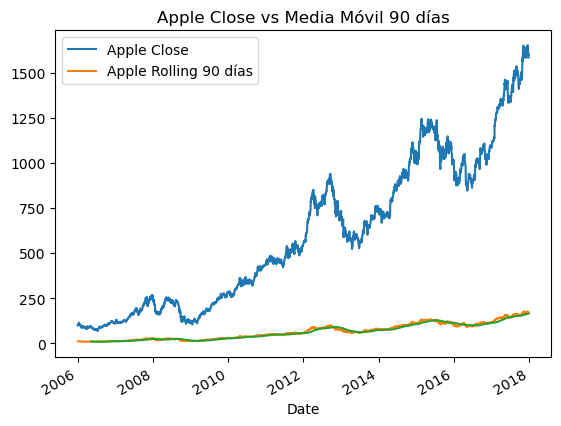

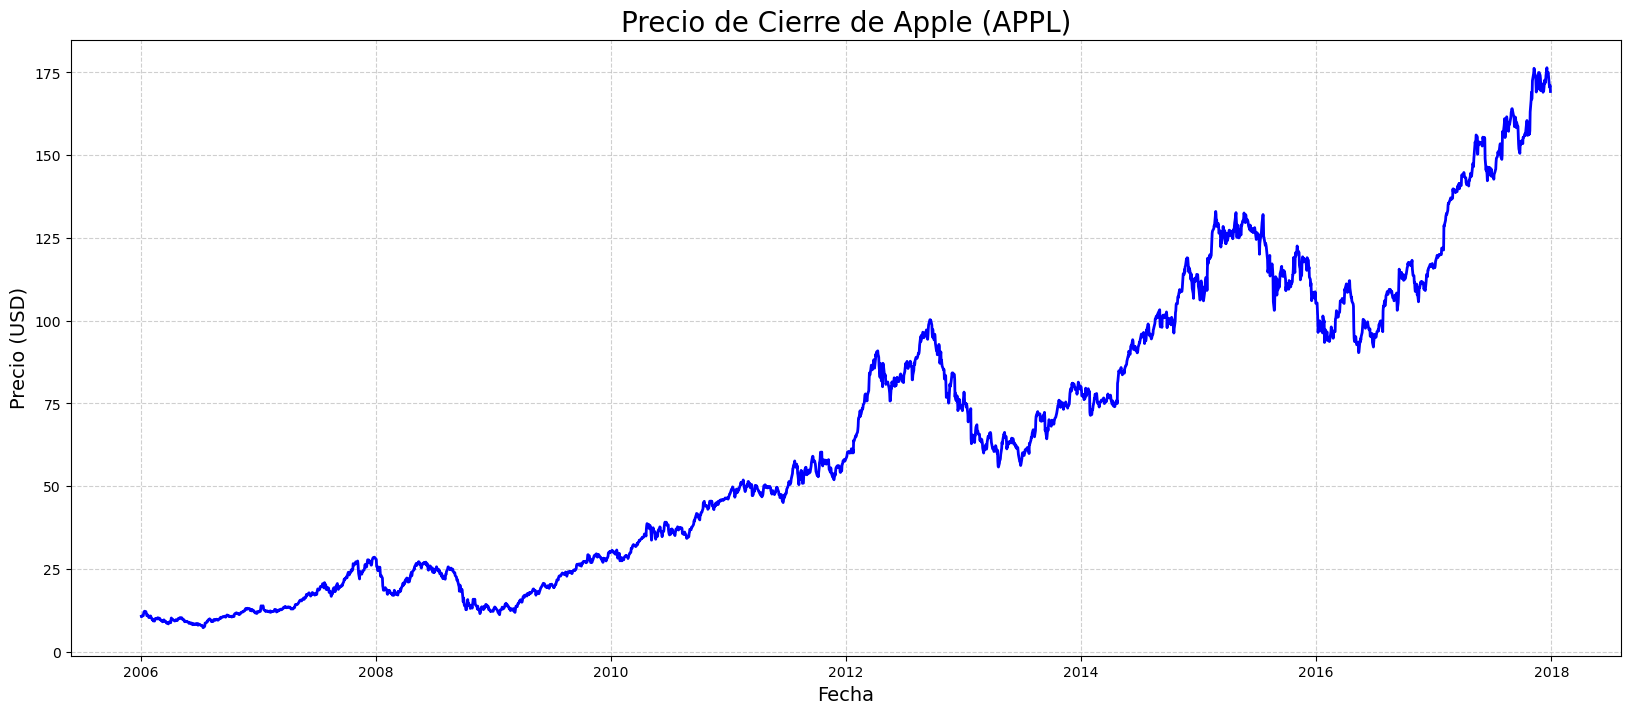

In [83]:
import matplotlib.pyplot as plt

# Gráfico del precio de cierre
plt.figure(figsize=(20,8))
plt.plot(df_apple.index, df_apple['Close'], color='blue', linewidth=2)

# Personalización
plt.title("Precio de Cierre de Apple (APPL)", fontsize=20)
plt.xlabel("Fecha", fontsize=14)
plt.ylabel("Precio (USD)", fontsize=14)
plt.grid(True, linestyle="--", alpha=0.6)

# Mostrar
plt.show()


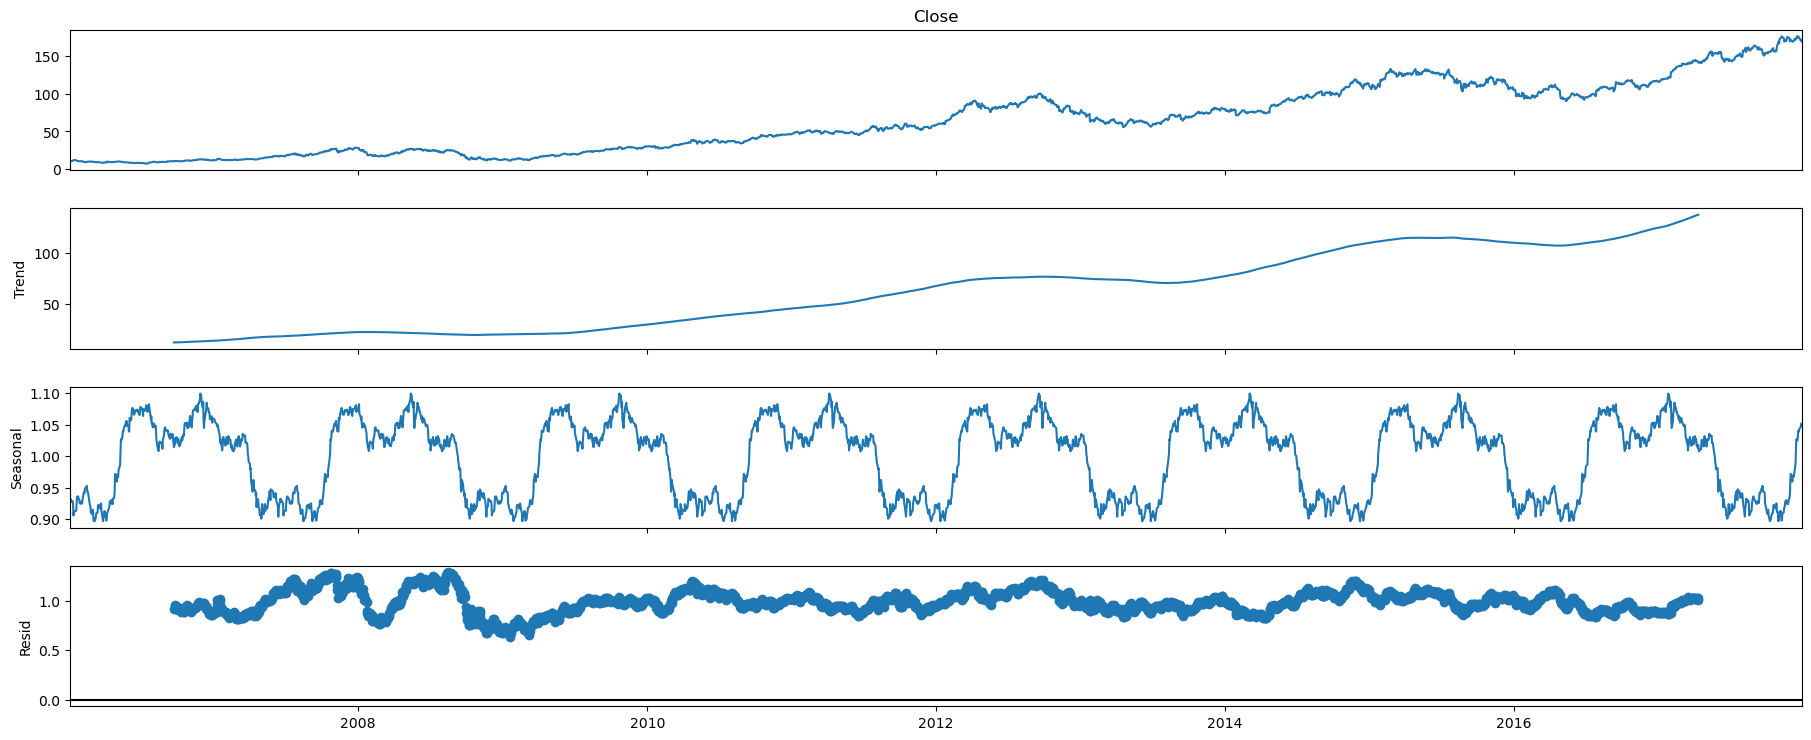

In [84]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Descomponer la serie
decomposed_apple_volume = sm.tsa.seasonal_decompose(
    df_apple['Close'], 
    model='multiplicative', 
    period=365  # un año si son datos diarios
)

# Plot
fig = decomposed_apple_volume.plot()
fig.set_size_inches(20,8)  # ajusta el tamaño de la figura
plt.show()

# **Insights**

- Tendencia creciente.
- Estacionalidad claramente identificada.
- Ruido que representa outliers y valores posiblemente no incluidos.
____

# **Predicción Simple - Medias Móviles**

- Se hará una predicción usando medias móviles.
- La media móvil no es más que sacar el promedio de una ventana de tiempo hacia atrás de la variable a predecir.

In [85]:
ma_apple_mean = df_apple.select_dtypes(include='number')

In [86]:
ma_apple_mean = ma_apple_mean.rolling(window=30).mean()

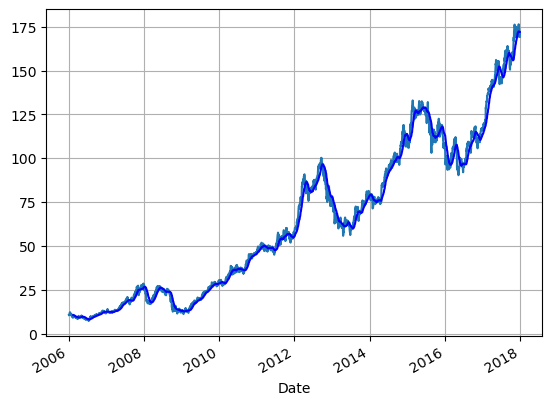

In [87]:
df_apple['Close'].plot()
ma_apple_mean['Close'].plot(color='blue')
plt.grid()
plt.show()

# **Predicción con Medias Móviles**

In [88]:
train_len = 2500
train = df_apple[0:train_len]
test = df_apple[train_len:]

In [89]:
y_pred_sma = df_apple.copy()
ma_window = 30
y_pred_sma['sma_forecast'] = df_apple['High'].rolling(ma_window).mean()
y_pred_sma['sma_forecast'][train_len] = y_pred_sma['sma_forecast'][train_len-1]

C:\Users\danielortega\AppData\Local\Temp\ipykernel_31456\2965954951.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\danielortega\AppData\Local\Temp\ipykernel_31456\2965954951.py:4: FutureWarning:

ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and e

## **Graficamos las predicciones**

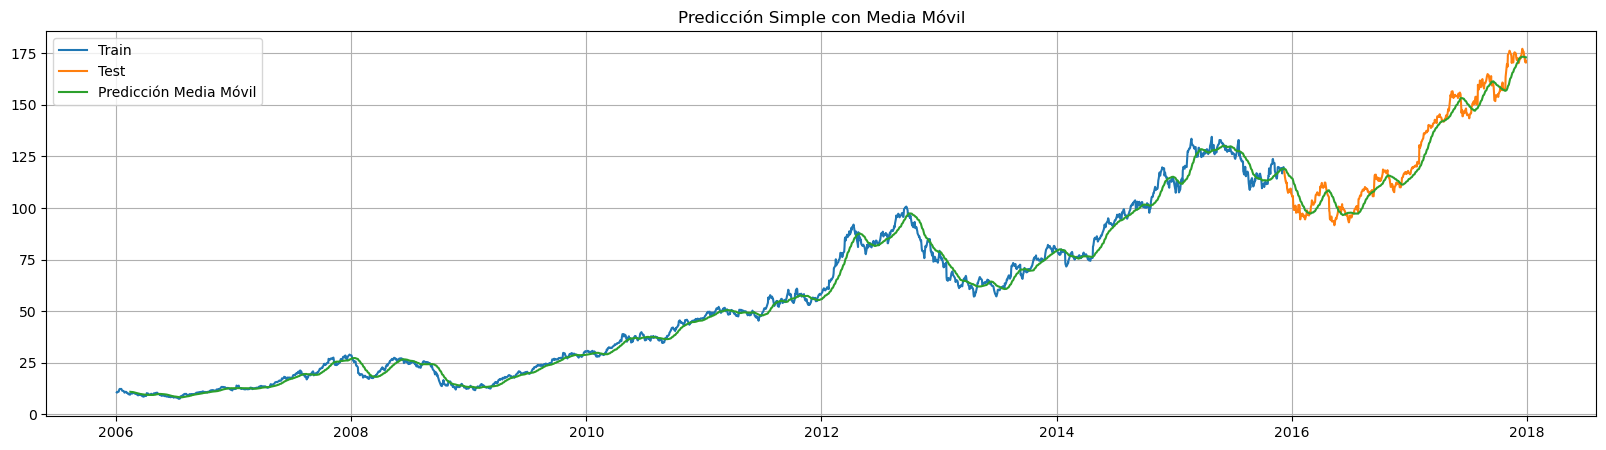

In [90]:
plt.figure(figsize=(20,5))
plt.grid()
plt.plot(train['High'], label='Train')
plt.plot(test['High'], label='Test')
plt.plot(y_pred_sma['sma_forecast'], label='Predicción Media Móvil')
plt.legend(loc='best')
plt.title('Predicción Simple con Media Móvil')
plt.show()

In [91]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test['High'], y_pred_sma['sma_forecast'][train_len:])).round(2)
mape = np.round(np.mean(np.abs((test['High'] - y_pred_sma['sma_forecast'][train_len:]) / test['High'])) * 100, 2)

results = pd.DataFrame({'Method': ['Simple moving average forecast'], 'MAPE': [mape], 'RMSE':[rmse]})
results = results[['Method', 'MAPE', 'RMSE']]
results

,Method,MAPE,RMSE
0,Simple moving average forecast,3.840000,5.750000


In [92]:
y_comparison = pd.DataFrame().assign(forecast=y_pred_sma['sma_forecast'])
y_comparison['observed'] = df_apple['High']

In [93]:
y_comparison.tail(10)

,forecast,observed
Date,,
2017-12-15,173.237333,174.170000
2017-12-18,173.335333,177.200000
2017-12-19,173.348667,175.390000
2017-12-20,173.354333,175.420000
2017-12-21,173.347000,176.020000
2017-12-22,173.324333,175.420000
2017-12-26,173.194000,171.470000
2017-12-27,173.070000,170.780000
2017-12-28,173.015667,171.850000
